In [ ]:
!pip install tensorflowjs
!pip install tensorflow-gpu==2.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, ReLU, BatchNormalization, add,Softmax, AveragePooling2D, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

class_names = ['adidas', 'apple_store', 'h&m', 'hudsons_bay', 'mcdonalds',
               'starbucks', 'subway', 'tim_hortons', 'wendys', 'zara']

In [ ]:
from keras.layers import Dense, Activation, Flatten, Dropout

def MobileNetV2_model(learning_rate, input_shape,class_number):
    baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_tensor=Input(shape=input_shape))
    for layer in baseModel.layers[:-4]:
        layer.trainable = False
   
    model = Sequential()
    model.add(baseModel)
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(class_number, activation='softmax'))

    return model

In [ ]:
import random

training_seed = random.randint(0,1000000000)
validation_seed = random.randint(0,1000000000)

while(training_seed == validation_seed):
  validation_seed = random.randint(0,1000000000)

image_size = 224
batch_size =32

train_ds = tf.keras.utils.image_dataset_from_directory(
  './drive/MyDrive/ConUHacks/dataset',
  validation_split=0.2,
  subset="training",
  seed=training_seed,
  image_size=(image_size, image_size),
  batch_size=batch_size)

Found 925 files belonging to 10 classes.
Using 740 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  './drive/MyDrive/ConUHacks/dataset',
  validation_split=0.2,
  subset="validation",
  seed=validation_seed,
  image_size=(image_size, image_size),
  batch_size=batch_size)

Found 925 files belonging to 10 classes.
Using 185 files for validation.


In [ ]:
bs = 32
lr = 0.01
size = (224, 224)
input_shape = (224,224, 3)
class_number = 10

model = MobileNetV2_model(lr,input_shape,class_number)
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 average_pooling2d (AverageP  (None, 3, 3, 1280)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 11520)             0         
                                                                 
 dense (Dense)               (None, 512)               5898752   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                2

In [ ]:
# Training
epochs = 100

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=bs
)

Epoch 1/200
24/24 [==============================] - 55s 2s/step - loss: 4.2881 - accuracy: 0.1054 - val_loss: 2.3006 - val_accuracy: 0.1784
Epoch 2/200
24/24 [==============================] - 32s 1s/step - loss: 2.5208 - accuracy: 0.1486 - val_loss: 2.2983 - val_accuracy: 0.1784
Epoch 3/200
24/24 [==============================] - 40s 2s/step - loss: 2.5256 - accuracy: 0.1243 - val_loss: 2.2826 - val_accuracy: 0.2108
Epoch 4/200
24/24 [==============================] - 32s 1s/step - loss: 2.4001 - accuracy: 0.1486 - val_loss: 2.2949 - val_accuracy: 0.1838
Epoch 5/200
24/24 [==============================] - 37s 2s/step - loss: 2.3923 - accuracy: 0.1230 - val_loss: 2.2419 - val_accuracy: 0.1784
Epoch 6/200
24/24 [==============================] - 37s 2s/step - loss: 2.4207 - accuracy: 0.1419 - val_loss: 2.2902 - val_accuracy: 0.1784
Epoch 7/200
24/24 [==============================] - 37s 2s/step - loss: 2.3368 - accuracy: 0.1378 - val_loss: 2.2882 - val_accuracy: 0.1784
Epoch 8/200
2

In [ ]:
model.save('store_front_classifier_100_Epochs.h5')

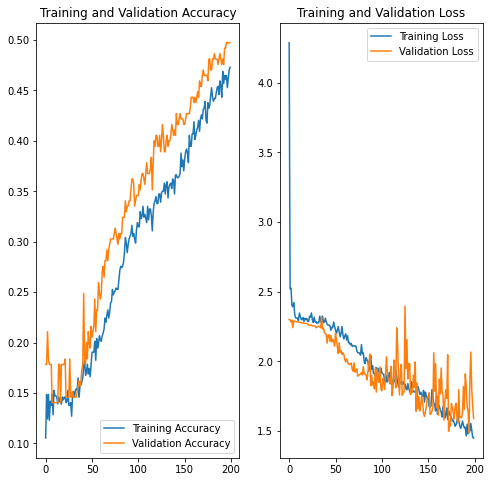

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

model.evaluate(val_ds, return_dict=True)

y_pred = model.predict(val_ds)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(val_ds.map(lambda s,lab: lab)), axis=0)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels= class_names,
            yticklabels=class_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()



In [ ]:
from keras.models import load_model
import keras.utils as image

classifier = load_model('store_front_classifier_50_Epochs.h5')

In [ ]:
test_image = image.load_img('./drive/MyDrive/ConUHacks/dataset/mcdonalds/mcdonalds (102).jpg', target_size=(image_size, image_size))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=3)

test_image = test_image.reshape(1,224,224,3) 

result = model.predict(test_image, batch_size=1)
class_prediction = np.argmax(result)
print (result)
print(class_prediction)

1/1 [==============================] - 1s 829ms/step
[[0.04418478 0.02695396 0.12112936 0.07707079 0.20202468 0.08149037
  0.11507605 0.1289855  0.13403839 0.06904605]]
4


In [ ]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(classifier, 'tsjs_models')